In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

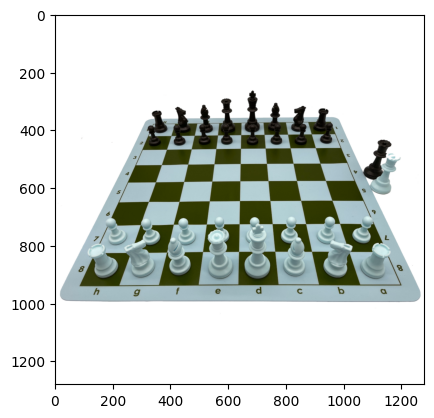

In [3]:
img_raw = cv2.imread('resources/sample_board.png') 
plt.imshow(img_raw)

In [28]:
img = copy.deepcopy(img_raw)

points=[]



def click_event(event, x, y, flags, params): 
      
    if event == cv2.EVENT_LBUTTONDOWN: 
        points.append((x, y))
        cv2.circle(img,(x,y),5,(0,0,255),-1)
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(img,str(x)+','+str(y),(x,y), font,1,(255, 0, 0),2) 
        cv2.imshow('image', img) 

cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
pts_1 = np.float32(points)
pts_2 = np.float32(((0,0), (400,0), (0, 400), (400, 400)))

transformer = cv2.getPerspectiveTransform(pts_1, pts_2)

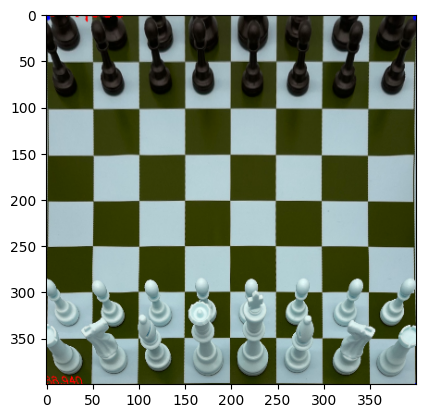

In [30]:
new_img = cv2.warpPerspective(img, transformer, (400,400))
plt.imshow(new_img)

## Plan:
- Use contour detection to identify pieces
- Use hsv filter to classify cells (white square white piece, black square black piece)

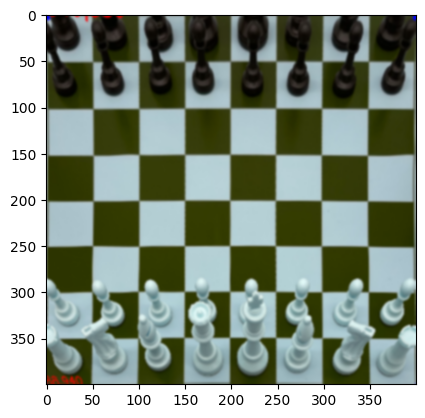

In [31]:
blurred = cv2.GaussianBlur(new_img, (5, 5), 0)
plt.imshow(blurred)

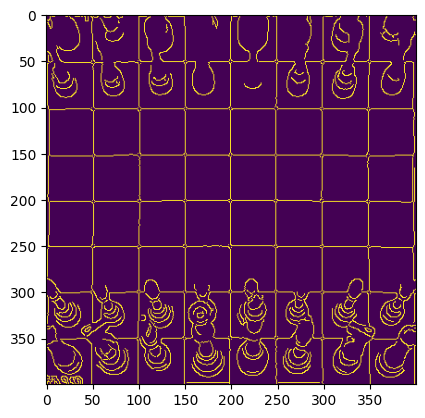

In [35]:
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)



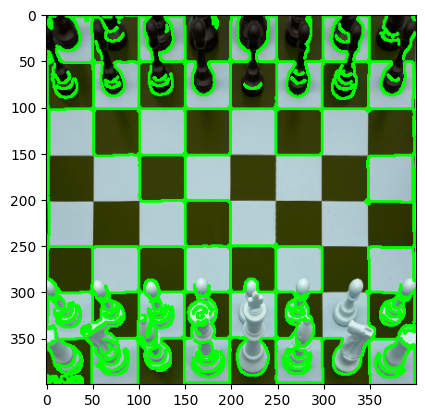

In [37]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
#contour_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
contour_img = copy.deepcopy(new_img)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.imshow(contour_img)

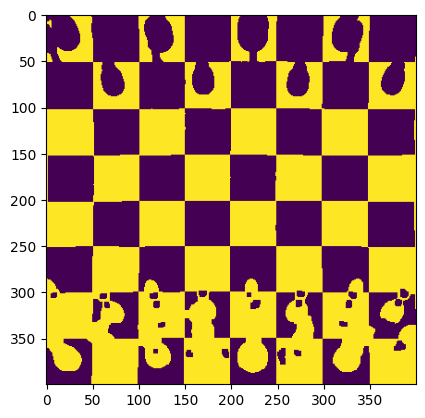

In [50]:
hsv = cv2.cvtColor(new_img, cv2.COLOR_BGR2HSV)

# Define range for white pieces (tweak these values if needed)
lower_white = np.array([0, 0, 120])  # Low saturation, high value
upper_white = np.array([180, 50, 255])

# Threshold the image to keep only white regions
mask = cv2.inRange(hsv, lower_white, upper_white)

# Apply morphological operations to remove small noise
kernel = np.ones((5, 5), np.uint8)
mask2 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
mask3 = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # Fill small holes

plt.imshow(mask3)


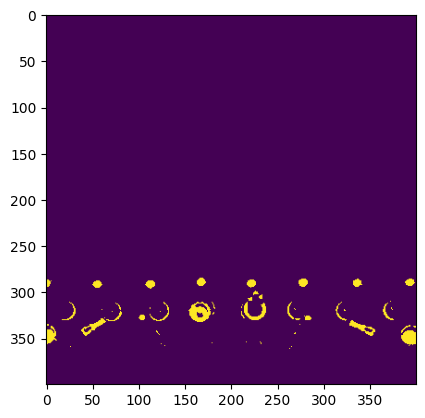

In [48]:
plt.imshow(mask)